## 全连接神经网络

In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt

### Boston

In [2]:
from sklearn import datasets

boston = datasets.load_boston()

X = boston.data
y = boston.target

### 将 type 转为 float32

In [3]:
X = X.astype(np.float32)
y = y.astype(np.float32)

### split training set and testing set

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

### 标准化

In [5]:
from sklearn.preprocessing import StandardScaler

standard = StandardScaler()
standard.fit(X_train)
X_train_standard = standard.transform(X_train)
X_test_standard = standard.transform(X_test)

### 将 array 转为 tensor

In [6]:
X_tensor_train = torch.from_numpy(X_train_standard)
X_tensor_test = torch.from_numpy(X_test_standard)
y_tensor_train = torch.from_numpy(y_train)
y_tensor_test = torch.from_numpy(y_test)

In [7]:
print('the type of X is: ', type(X_tensor_train), 'the dtype is:', X_tensor_train.dtype)
print('the type of y is: ', type(X_tensor_test), 'the dtype is:', X_tensor_test.dtype)
print('the type of X is: ', type(y_tensor_train), 'the dtype is:', y_tensor_train.dtype)
print('the type of y is: ', type(y_tensor_test), 'the dtype is:', y_tensor_test.dtype)

the type of X is:  <class 'torch.Tensor'> the dtype is: torch.float32
the type of y is:  <class 'torch.Tensor'> the dtype is: torch.float32
the type of X is:  <class 'torch.Tensor'> the dtype is: torch.float32
the type of y is:  <class 'torch.Tensor'> the dtype is: torch.float32


In [8]:
print('the shape of X_train: ', X_tensor_train.shape)
print('the shape of X_test: ', X_tensor_test.shape)
print('the shape of y_train: ', y_tensor_train.shape)
print('the shape of y_test: ', y_tensor_test.shape)

the shape of X_train:  torch.Size([404, 13])
the shape of X_test:  torch.Size([102, 13])
the shape of y_train:  torch.Size([404])
the shape of y_test:  torch.Size([102])


In [9]:
X_train_variable = Variable(X_tensor_train)
X_test_variable = Variable(X_tensor_test)
y_train_variable = Variable(y_tensor_train)
y_test_variable = Variable(y_tensor_test)

### 搭建 全连接神经网络

In [10]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(13, 64),
            nn.ReLU(inplace=True),
            nn.Linear(64, 32),
            nn.ReLU(inplace=True),
            nn.Linear(32, 1),
#            nn.ReLU(inplace=True),
        )
        
    def forward(self, x):
        # 真正搭网络的地方, x 输入信息
        x = self.model(x)
        return x

In [11]:
net = Net()
net

Net(
  (model): Sequential(
    (0): Linear(in_features=13, out_features=64, bias=True)
    (1): ReLU(inplace)
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU(inplace)
    (4): Linear(in_features=32, out_features=1, bias=True)
  )
)

In [12]:
# 查看模型参数
net.parameters

<bound method Module.parameters of Net(
  (model): Sequential(
    (0): Linear(in_features=13, out_features=64, bias=True)
    (1): ReLU(inplace)
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU(inplace)
    (4): Linear(in_features=32, out_features=1, bias=True)
  )
)>

In [13]:
# 优化器 和 损失函数
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
loss_func = nn.MSELoss()

In [14]:
# 开始训练
EPOCH = 80000

train_losses = [] # 查看训练集的损失函数变化
test_losses = [] # 查看测试集的损失函数变化
for epoch in range(EPOCH):
    
    train_prediction = net(X_train_variable)
    train_loss = loss_func(y_train_variable.view(-1, 1), train_prediction)
    train_losses.append(train_loss)
    
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    if (epoch + 1) % 100 == 0:
        print('Training...Epoch: ', (epoch+1), 'train loss: ', train_loss.data.numpy())
    if (epoch + 1) % 500 == 0:
        test_prediction = net(X_test_variable)
        test_loss = loss_func(y_test_variable.view(-1, 1), test_prediction)
        test_losses.append(test_loss)

        optimizer.zero_grad()
        test_loss.backward()
        optimizer.step()
        print('Test...Epoch: ', (epoch+1), 'test loss: ', test_loss.data.numpy())

Training...Epoch:  100 train loss:  78.4783
Training...Epoch:  200 train loss:  20.983786
Training...Epoch:  300 train loss:  14.69725
Training...Epoch:  400 train loss:  11.074521
Training...Epoch:  500 train loss:  9.427882
Test...Epoch:  500 test loss:  20.10726
Training...Epoch:  600 train loss:  8.308855
Training...Epoch:  700 train loss:  7.3524165
Training...Epoch:  800 train loss:  6.4889617
Training...Epoch:  900 train loss:  5.8056417
Training...Epoch:  1000 train loss:  5.235638
Test...Epoch:  1000 test loss:  19.25567
Training...Epoch:  1100 train loss:  4.774235
Training...Epoch:  1200 train loss:  4.3939238
Training...Epoch:  1300 train loss:  4.044432
Training...Epoch:  1400 train loss:  3.7145305
Training...Epoch:  1500 train loss:  3.4688542
Test...Epoch:  1500 test loss:  19.69184
Training...Epoch:  1600 train loss:  3.2467263
Training...Epoch:  1700 train loss:  3.0446339
Training...Epoch:  1800 train loss:  2.8844764
Training...Epoch:  1900 train loss:  2.7424195
Tr

Training...Epoch:  14900 train loss:  0.13567856
Training...Epoch:  15000 train loss:  0.1328243
Test...Epoch:  15000 test loss:  8.980834
Training...Epoch:  15100 train loss:  0.13165207
Training...Epoch:  15200 train loss:  0.1281367
Training...Epoch:  15300 train loss:  0.12537917
Training...Epoch:  15400 train loss:  0.12270976
Training...Epoch:  15500 train loss:  0.119946204
Test...Epoch:  15500 test loss:  8.860998
Training...Epoch:  15600 train loss:  0.1196549
Training...Epoch:  15700 train loss:  0.11659853
Training...Epoch:  15800 train loss:  0.11424425
Training...Epoch:  15900 train loss:  0.11177445
Training...Epoch:  16000 train loss:  0.10942359
Test...Epoch:  16000 test loss:  8.738735
Training...Epoch:  16100 train loss:  0.10868051
Training...Epoch:  16200 train loss:  0.10578517
Training...Epoch:  16300 train loss:  0.10344184
Training...Epoch:  16400 train loss:  0.10118647
Training...Epoch:  16500 train loss:  0.09896088
Test...Epoch:  16500 test loss:  8.588473
T

Training...Epoch:  29200 train loss:  0.022555394
Training...Epoch:  29300 train loss:  0.02225907
Training...Epoch:  29400 train loss:  0.021992834
Training...Epoch:  29500 train loss:  0.021730488
Test...Epoch:  29500 test loss:  6.0258775
Training...Epoch:  29600 train loss:  0.022249628
Training...Epoch:  29700 train loss:  0.021758135
Training...Epoch:  29800 train loss:  0.021463653
Training...Epoch:  29900 train loss:  0.021200465
Training...Epoch:  30000 train loss:  0.020951781
Test...Epoch:  30000 test loss:  5.954993
Training...Epoch:  30100 train loss:  0.021422403
Training...Epoch:  30200 train loss:  0.020956364
Training...Epoch:  30300 train loss:  0.020685215
Training...Epoch:  30400 train loss:  0.020440178
Training...Epoch:  30500 train loss:  0.02020308
Test...Epoch:  30500 test loss:  5.902255
Training...Epoch:  30600 train loss:  0.020739041
Training...Epoch:  30700 train loss:  0.020276636
Training...Epoch:  30800 train loss:  0.019992342
Training...Epoch:  30900 

Training...Epoch:  43300 train loss:  0.009082477
Training...Epoch:  43400 train loss:  0.008958552
Training...Epoch:  43500 train loss:  0.008841633
Test...Epoch:  43500 test loss:  4.7273254
Training...Epoch:  43600 train loss:  0.009222012
Training...Epoch:  43700 train loss:  0.008965745
Training...Epoch:  43800 train loss:  0.008830864
Training...Epoch:  43900 train loss:  0.008712919
Training...Epoch:  44000 train loss:  0.008608461
Test...Epoch:  44000 test loss:  4.667492
Training...Epoch:  44100 train loss:  0.008972533
Training...Epoch:  44200 train loss:  0.0087133795
Training...Epoch:  44300 train loss:  0.008583388
Training...Epoch:  44400 train loss:  0.00846646
Training...Epoch:  44500 train loss:  0.008356711
Test...Epoch:  44500 test loss:  4.676886
Training...Epoch:  44600 train loss:  0.008806024
Training...Epoch:  44700 train loss:  0.008538128
Training...Epoch:  44800 train loss:  0.008404292
Training...Epoch:  44900 train loss:  0.008292215
Training...Epoch:  4500

Training...Epoch:  57300 train loss:  0.0044636144
Training...Epoch:  57400 train loss:  0.004394547
Training...Epoch:  57500 train loss:  0.0043321876
Test...Epoch:  57500 test loss:  3.8943098
Training...Epoch:  57600 train loss:  0.0046441397
Training...Epoch:  57700 train loss:  0.0044351364
Training...Epoch:  57800 train loss:  0.004348122
Training...Epoch:  57900 train loss:  0.0042795786
Training...Epoch:  58000 train loss:  0.0042222925
Test...Epoch:  58000 test loss:  3.8786645
Training...Epoch:  58100 train loss:  0.004547999
Training...Epoch:  58200 train loss:  0.004348191
Training...Epoch:  58300 train loss:  0.0042615053
Training...Epoch:  58400 train loss:  0.004196894
Training...Epoch:  58500 train loss:  0.0041378927
Test...Epoch:  58500 test loss:  3.8459897
Training...Epoch:  58600 train loss:  0.0044052647
Training...Epoch:  58700 train loss:  0.004222956
Training...Epoch:  58800 train loss:  0.004145452
Training...Epoch:  58900 train loss:  0.0040809233
Training...

Training...Epoch:  71200 train loss:  0.0024124077
Training...Epoch:  71300 train loss:  0.0023549278
Training...Epoch:  71400 train loss:  0.0023115554
Training...Epoch:  71500 train loss:  0.002271948
Test...Epoch:  71500 test loss:  3.3293133
Training...Epoch:  71600 train loss:  0.002572923
Training...Epoch:  71700 train loss:  0.0023950539
Training...Epoch:  71800 train loss:  0.0023316022
Training...Epoch:  71900 train loss:  0.0022837832
Training...Epoch:  72000 train loss:  0.0022453465
Test...Epoch:  72000 test loss:  3.2857726
Training...Epoch:  72100 train loss:  0.0024622327
Training...Epoch:  72200 train loss:  0.0023200626
Training...Epoch:  72300 train loss:  0.0022642575
Training...Epoch:  72400 train loss:  0.0022200346
Training...Epoch:  72500 train loss:  0.00218172
Test...Epoch:  72500 test loss:  3.26293
Training...Epoch:  72600 train loss:  0.0024338136
Training...Epoch:  72700 train loss:  0.0022814022
Training...Epoch:  72800 train loss:  0.0022225052
Training..

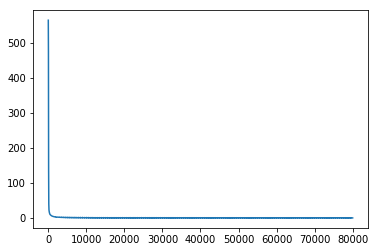

In [15]:
plt.plot(range(len(train_losses)), train_losses)

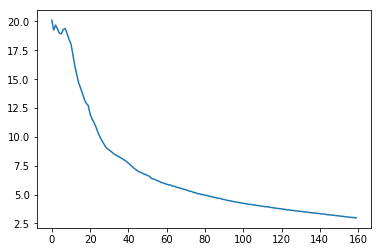

In [16]:
plt.plot(range(len(test_losses)), test_losses)

In [17]:
y_train_predict = train_prediction.data.numpy()
y_test_predict = test_prediction.data.numpy()

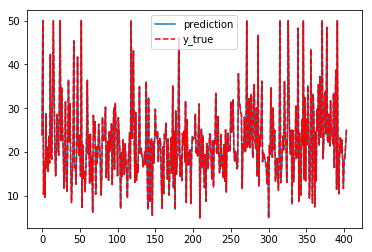

In [18]:
plt.plot(range(len(y_train_predict)), y_train_predict, label='prediction')
plt.plot(range(len(y_train)), y_train, 'r--', label='y_true')
plt.legend()
plt.show()

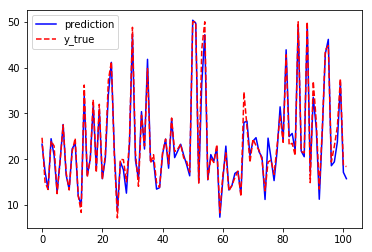

In [19]:
plt.plot(range(len(y_test_predict)), y_test_predict, 'b', label='prediction')
plt.plot(range(len(y_test)),  y_test, 'r--', label='y_true')
plt.legend()
plt.show()

In [20]:
# 使用 sklearn 封装好的评估指标
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse_2 = mean_squared_error(y_test, y_test_predict)
rmse_2 = np.sqrt(mean_squared_error(y_test, y_test_predict))
mae_2 = mean_absolute_error(y_test, y_test_predict)
r2_2 = r2_score(y_test, y_test_predict)

In [21]:
print('MSE: ', mse_2)
print('RMSE: ', rmse_2)
print('MAE: ', mae_2)
print('R2: ', r2_2)

MSE:  2.9796686
RMSE:  1.7261716
MAE:  1.1921265
R2:  0.9715225627124822
